### This notebook uses the aggregated GTL experiment results to generate candle plot for comparing F1 metric

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

master_df = pd.read_csv("/result/GTLGPT_result.csv")

In [ ]:
master_df['Prompt Type'].unique()

array(['t_table', 't_annony'], dtype=object)

In [ ]:
master_df.columns

Index(['Model', 'Prompt Type', 'Num Features', 'Sample Size',
       'Class 1 Proportion', 'Set ID', 'Run Number', 'Accuracy', 'Precision',
       'Recall', 'F1 Score', 'Prediction', 'PR_AUC', 'ROC_AUC'],
      dtype='object')

In [ ]:
def extract_metric_vals(df,prompt_type,sample_set, metric,prop=None):
  df_template = df[df["Prompt Type"] == prompt_type]
  df_template_nogpt = df_template[df_template['Model']!='GPT4']
  assert len(df_template_nogpt['Model'].unique()) == 3
  assert len(df_template_nogpt['Sample Size'].unique()) == 5

  if prop is not None:
    df_template_nogpt = df_template_nogpt[df_template_nogpt['Class 1 Proportion'].isin(prop)]

  return df_template_nogpt[df_template_nogpt['Sample Size'] == sample_set][metric].tolist()


## F1 for all proportions included

In [ ]:
# Example dataset (replace this with your actual data)
data = {
    "Category": [0,8,16,32,64],  # # In-context examples
    "T-table": [
        extract_metric_vals(master_df,'t_table',0, 'F1 Score'),
        extract_metric_vals(master_df,'t_table',8, 'F1 Score'),
        extract_metric_vals(master_df,'t_table',16, 'F1 Score'),
        extract_metric_vals(master_df,'t_table',32, 'F1 Score'),
        extract_metric_vals(master_df,'t_table',64, 'F1 Score')
    ],
    "T-anony": [
        extract_metric_vals(master_df,'t_annony',0, 'F1 Score'),
        extract_metric_vals(master_df,'t_annony',8, 'F1 Score'),
        extract_metric_vals(master_df,'t_annony',16, 'F1 Score'),
        extract_metric_vals(master_df,'t_annony',32, 'F1 Score'),
        extract_metric_vals(master_df,'t_annony',64, 'F1 Score')
    ],
}

df = pd.DataFrame(data)

# Function to calculate medians and percentiles
def calc_stats(values):
    return pd.DataFrame(
        {
            "Median": [np.median(v) for v in values],
            "25th": [np.percentile(v, 25) for v in values],
            "75th": [np.percentile(v, 75) for v in values],
        }
    )

# Calculate stats for each group
t_table_stats = calc_stats(df["T-table"])
t_anony_stats = calc_stats(df["T-anony"])


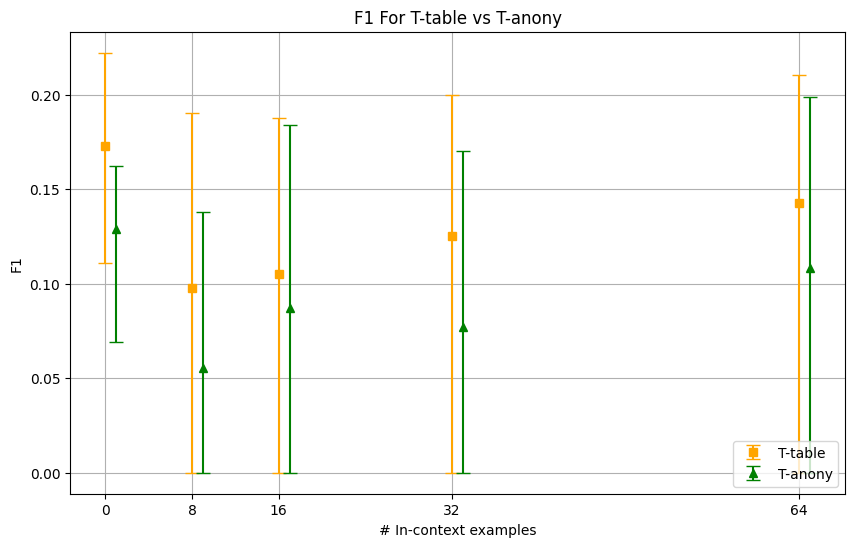

In [ ]:
# Define x-axis positions
x_positions = np.array(df["Category"])
offset = 1  # Distance between categories within each group

# Create the plot
plt.figure(figsize=(10, 6))


# Plot for T-table
plt.errorbar(
    x_positions,  # Center for T-table
    t_table_stats["Median"],
    yerr=[
        t_table_stats["Median"] - t_table_stats["25th"],
        t_table_stats["75th"] - t_table_stats["Median"],
    ],
    fmt="s",
    capsize=5,
    color="orange",
    label="T-table",
)

# Plot for T-anony
plt.errorbar(
    x_positions + offset,  # Shift right for T-anony
    t_anony_stats["Median"],
    yerr=[
        t_anony_stats["Median"] - t_anony_stats["25th"],
        t_anony_stats["75th"] - t_anony_stats["Median"],
    ],
    fmt="^",
    capsize=5,
    color="green",
    label="T-anony",
)

# Customize the plot
plt.xlabel("# In-context examples")
plt.ylabel("F1")
plt.title("F1 For T-table vs T-anony")
plt.xticks(x_positions, labels=df["Category"])
plt.grid(True)

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()


In [ ]:
data = {
    "Category": [0,8,16,32,64],  # # In-context examples
    "T-table": [
        extract_metric_vals(master_df,'t_table',0, 'F1 Score',prop=[0.3,0.5]),
        extract_metric_vals(master_df,'t_table',8, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_table',16, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_table',32, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_table',64, 'F1 Score',[0.3,0.5])
    ],
    "T-anony": [
        extract_metric_vals(master_df,'t_annony',0, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_annony',8, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_annony',16, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_annony',32, 'F1 Score',[0.3,0.5]),
        extract_metric_vals(master_df,'t_annony',64, 'F1 Score',[0.3,0.5])
    ],
}

df = pd.DataFrame(data)

# Function to calculate medians and percentiles
def calc_stats(values):
    return pd.DataFrame(
        {
            "Median": [np.median(v) for v in values],
            "25th": [np.percentile(v, 25) for v in values],
            "75th": [np.percentile(v, 75) for v in values],
        }
    )

# Calculate stats for each group
t_table_stats = calc_stats(df["T-table"])
t_anony_stats = calc_stats(df["T-anony"])


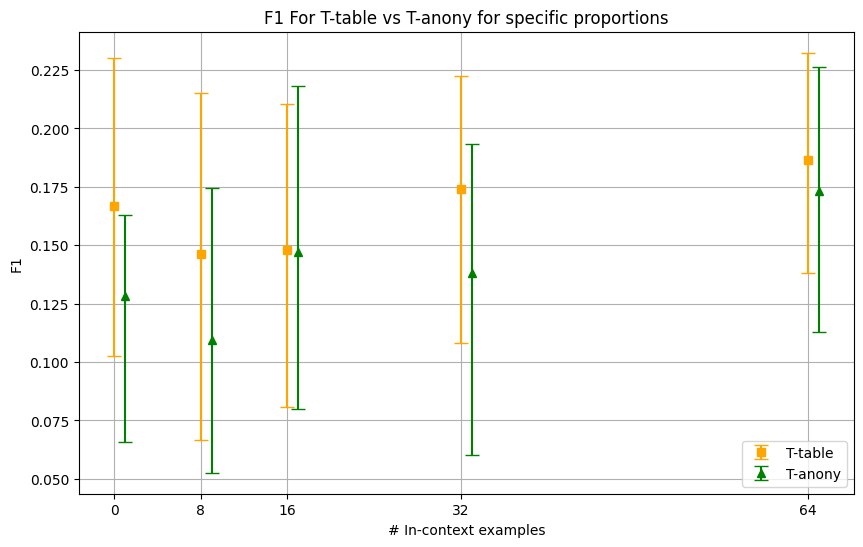

In [ ]:
# Define x-axis positions
x_positions = np.array(df["Category"])
offset = 1  # Distance between categories within each group

# Create the plot
plt.figure(figsize=(10, 6))


# Plot for T-table
plt.errorbar(
    x_positions,  # Center for T-table
    t_table_stats["Median"],
    yerr=[
        t_table_stats["Median"] - t_table_stats["25th"],
        t_table_stats["75th"] - t_table_stats["Median"],
    ],
    fmt="s",
    capsize=5,
    color="orange",
    label="T-table",
)

# Plot for T-anony
plt.errorbar(
    x_positions + offset,  # Shift right for T-anony
    t_anony_stats["Median"],
    yerr=[
        t_anony_stats["Median"] - t_anony_stats["25th"],
        t_anony_stats["75th"] - t_anony_stats["Median"],
    ],
    fmt="^",
    capsize=5,
    color="green",
    label="T-anony",
)

# Customize the plot
plt.xlabel("# In-context examples")
plt.ylabel("F1")
plt.title("F1 For T-table vs T-anony for specific proportions")
plt.xticks(x_positions, labels=df["Category"])
plt.grid(True)

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()
